# New Approaches To Space Time Singularities by Susan Scott
##  Geoff Cope
##  Univeristy of Utah
##  𐐏𐐭𐑌𐐲𐑂𐐲𐑉𐑅𐐮𐐻𐐨 𐐲𐑂 𐐏𐐭𐐻𐐫
##  January 24, 2022

For now we just work with the Weyl metric given by equation 4.1 page 65 and will return to the others later.  Same metric is also equation 1.1 page 2 with same field equations. 

https://digital.library.adelaide.edu.au/dspace/bitstream/2440/19586/2/02whole.pdf

In [1]:
from sympy import init_session
init_session(use_latex=True)

IPython console for SymPy 1.9 (Python 3.8.8-64-bit) (ground types: gmpy)

These commands were executed:
>>> from __future__ import division
>>> from sympy import *
>>> x, y, z, t = symbols('x y z t')
>>> k, m, n = symbols('k m n', integer=True)
>>> f, g, h = symbols('f g h', cls=Function)
>>> init_printing()

Documentation can be found at https://docs.sympy.org/1.9/



In [2]:
import warnings
import matplotlib.cbook
warnings.filterwarnings("ignore",category=matplotlib.cbook.mplDeprecation)

In [12]:
t,r,phi,z,dt,dr,dphi,dz = symbols('t r phi z dt dr dphi dz')

In [4]:
Lambda = Function('lambda')(r,z)
Lambda

In [5]:
nu = Function('nu')(r,z)
nu

In [6]:
variables = Matrix([t,r,phi,z])
variables

⎡t⎤
⎢ ⎥
⎢r⎥
⎢ ⎥
⎢φ⎥
⎢ ⎥
⎣z⎦

In [13]:
differentials = Matrix([dt,dr,dphi,dz])
differentials 

⎡ dt ⎤
⎢    ⎥
⎢ dr ⎥
⎢    ⎥
⎢dphi⎥
⎢    ⎥
⎣ dz ⎦

In [14]:
lineElement = expand( -exp(2*Lambda)*dt**2 + exp(2*(nu-Lambda))*(dr**2 + dz**2)+r**2 * exp(-2*Lambda)*dphi**2 ) 
lineElement

In [15]:
g = zeros(4)

for i in range(4):
    for j in range(4):
        if i == j:
            g[i,j] = lineElement.coeff( differentials[i],2 ) 
        else:
            g[i,j] = Rational(1,2)*lineElement.coeff( differentials[i]*differentials[j],1 )
            
g

⎡  2⋅λ(r, z)                                                                ⎤
⎢-ℯ                     0                   0                   0           ⎥
⎢                                                                           ⎥
⎢              -2⋅λ(r, z)  2⋅ν(r, z)                                        ⎥
⎢     0       ℯ          ⋅ℯ                 0                   0           ⎥
⎢                                                                           ⎥
⎢                                      2  -2⋅λ(r, z)                        ⎥
⎢     0                 0             r ⋅ℯ                      0           ⎥
⎢                                                                           ⎥
⎢                                                      -2⋅λ(r, z)  2⋅ν(r, z)⎥
⎣     0                 0                   0         ℯ          ⋅ℯ         ⎦

In [16]:
import sympy

In [17]:
m = sympy.Array(g)
m

⎡  2⋅λ(r, z)                                                                ⎤
⎢-ℯ                     0                   0                   0           ⎥
⎢                                                                           ⎥
⎢              -2⋅λ(r, z)  2⋅ν(r, z)                                        ⎥
⎢     0       ℯ          ⋅ℯ                 0                   0           ⎥
⎢                                                                           ⎥
⎢                                      2  -2⋅λ(r, z)                        ⎥
⎢     0                 0             r ⋅ℯ                      0           ⎥
⎢                                                                           ⎥
⎢                                                      -2⋅λ(r, z)  2⋅ν(r, z)⎥
⎣     0                 0                   0         ℯ          ⋅ℯ         ⎦

In [18]:
from einsteinpy.symbolic import *

In [19]:
syms = sympy.symbols("t r phi z")
t,r,phi,z = syms

In [20]:
metric = MetricTensor(m,syms)

In [21]:
ch = ChristoffelSymbols.from_metric(metric)
simplify(ch.tensor())

⎡                                            ⎡ 4⋅λ(r, z) - 2⋅ν(r, z) ∂                      
⎢⎡             ∂               ∂          ⎤  ⎢ℯ                     ⋅──(λ(r, z))            
⎢⎢     0       ──(λ(r, z))  0  ──(λ(r, z))⎥  ⎢                       ∂r                     
⎢⎢             ∂r              ∂z         ⎥  ⎢                                              
⎢⎢                                        ⎥  ⎢                                      ∂       
⎢⎢∂                                       ⎥  ⎢                0                   - ──(λ(r, 
⎢⎢──(λ(r, z))       0       0       0     ⎥  ⎢                                      ∂r      
⎢⎢∂r                                      ⎥  ⎢                                              
⎢⎢                                        ⎥  ⎢                                              
⎢⎢     0            0       0       0     ⎥  ⎢                0                             
⎢⎢                                        ⎥  ⎢                        

In [22]:
Ric = RicciTensor.from_metric(metric)
Ric.tensor()

⎡⎛    2                2                       ⎞                                            
⎢⎜   ∂                ∂             ∂          ⎟  4⋅λ(r, z) - 2⋅ν(r, z)                     
⎢⎜r⋅───(λ(r, z)) + r⋅───(λ(r, z)) + ──(λ(r, z))⎟⋅ℯ                                          
⎢⎜    2                2            ∂r         ⎟                                            
⎢⎝  ∂r               ∂z                        ⎠                                            
⎢──────────────────────────────────────────────────────────────────────                     
⎢                                  r                                                        
⎢                                                                                           
⎢                                                                          ⎛                
⎢                                                                          ⎜    ⎛∂          
⎢                                                                     

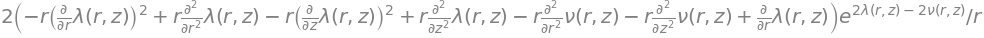

In [23]:
R = RicciScalar.from_riccitensor(Ric)
R.simplify()
R.expr

In [24]:
einst = EinsteinTensor.from_metric(metric)
einst.tensor()

⎡⎛    2                2                       ⎞                              ⎛             
⎢⎜   ∂                ∂             ∂          ⎟  4⋅λ(r, z) - 2⋅ν(r, z)       ⎜    ⎛∂       
⎢⎜r⋅───(λ(r, z)) + r⋅───(λ(r, z)) + ──(λ(r, z))⎟⋅ℯ                        1.0⋅⎜- r⋅⎜──(λ(r, 
⎢⎜    2                2            ∂r         ⎟                              ⎜    ⎝∂r      
⎢⎝  ∂r               ∂z                        ⎠                              ⎝             
⎢────────────────────────────────────────────────────────────────────── + ──────────────────
⎢                                  r                                                        
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                     

In [25]:
#  rm1 = RiemannCurvatureTensor.from_christoffels(ch)
#  rm1.tensor()

In [26]:
#  weyl = WeylTensor.from_metric(metric)
#  weyl.tensor()

In [27]:
ricciSimplified = simplify(Ric.tensor())
ricciSimplified

⎡⎛    2                2                       ⎞                                            
⎢⎜   ∂                ∂             ∂          ⎟  4⋅λ(r, z) - 2⋅ν(r, z)                     
⎢⎜r⋅───(λ(r, z)) + r⋅───(λ(r, z)) + ──(λ(r, z))⎟⋅ℯ                                          
⎢⎜    2                2            ∂r         ⎟                                            
⎢⎝  ∂r               ∂z                        ⎠                                            
⎢──────────────────────────────────────────────────────────────────────                     
⎢                                  r                                                        
⎢                                                                                           
⎢                                                                            ⎛              
⎢                                                                            ⎜  ⎛∂          
⎢                                                                     

In [28]:
einsteinSimplified = simplify(einst.tensor())
einsteinSimplified

⎡⎛                 2           2                           2           2                2   
⎢⎜    ⎛∂          ⎞           ∂               ⎛∂          ⎞           ∂                ∂    
⎢⎜- r⋅⎜──(λ(r, z))⎟  + 2.0⋅r⋅───(λ(r, z)) - r⋅⎜──(λ(r, z))⎟  + 2.0⋅r⋅───(λ(r, z)) - r⋅───(ν(
⎢⎜    ⎝∂r         ⎠            2              ⎝∂z         ⎠            2                2   
⎢⎝                           ∂r                                      ∂z               ∂r    
⎢───────────────────────────────────────────────────────────────────────────────────────────
⎢                                                                             r             
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                     

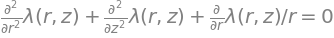

In [40]:
equation4pt2 = Eq(expand((1/r)*ricciSimplified[0,0].args[1]),0)
equation4pt2 

In [39]:
equation4pt3a = Eq(diff(nu,r), solve( einsteinSimplified[1,1], diff(nu,r) )[0] ) 
equation4pt3a

In [31]:
equation4pt3b = Eq( diff(nu,z),solve( ricciSimplified[3,1], diff(nu,z) )[0] ) 
equation4pt3b

In [42]:
vacuumFieldEquations = Matrix([equation4pt2,equation4pt3a,equation4pt3b])
vacuumFieldEquations

⎡                                ∂                ⎤
⎢    2              2            ──(λ(r, z))      ⎥
⎢   ∂              ∂             ∂r               ⎥
⎢  ───(λ(r, z)) + ───(λ(r, z)) + ─────────── = 0  ⎥
⎢    2              2                 r           ⎥
⎢  ∂r             ∂z                              ⎥
⎢                                                 ⎥
⎢                ⎛             2                2⎞⎥
⎢∂               ⎜⎛∂          ⎞    ⎛∂          ⎞ ⎟⎥
⎢──(ν(r, z)) = r⋅⎜⎜──(λ(r, z))⎟  - ⎜──(λ(r, z))⎟ ⎟⎥
⎢∂r              ⎝⎝∂r         ⎠    ⎝∂z         ⎠ ⎠⎥
⎢                                                 ⎥
⎢    ∂                 ∂           ∂              ⎥
⎢    ──(ν(r, z)) = 2⋅r⋅──(λ(r, z))⋅──(λ(r, z))    ⎥
⎣    ∂z                ∂r          ∂z             ⎦

In [43]:
X, Y = map(Function, 'XY')

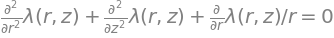

In [44]:
eq = vacuumFieldEquations[0]
eq

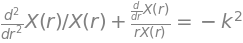

In [46]:
xODE = Eq(pde_separate( eq, Lambda, [X(r),Y(z)])[0] , -k**2 ) 
xODE

In [47]:
xSolution = dsolve( xODE , X(r))
xSolution 

In [48]:
#  Here we arbitrarily set one of the Bessel functions equal to zero... fix this later
xSolutionParticular = xSolution.subs(xSolution.args[1].args[0].args[0],1).subs(xSolution.args[1].args[1].args[0],0)
xSolutionParticular

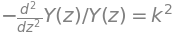

In [51]:
yODE = Eq( pde_separate( eq, Lambda, [X(r),Y(z)])[1] ,  k**2 ) 
yODE

In [53]:
ySolution = dsolve( yODE , Y(z))
ySolution 

In [54]:
#  Here we arbitrarily set sin equal to zero... fix this later
ySolutionParticular = ySolution.subs(ySolution.args[1].args[0].args[0],0).subs(ySolution.args[1].args[1].args[0],1)
ySolutionParticular

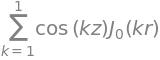

In [55]:
#  We'll keep the k is one term.... 
Sum( ( xSolutionParticular.args[1] * ySolutionParticular.args[1] ) ,(k,1,1) )

In [56]:
lambdaSolution = Eq(Lambda, Sum( ( xSolutionParticular.args[1] * ySolutionParticular.args[1] ) ,(k,1,1) ).doit() ) 
lambdaSolution

In [57]:
equation4pt3a.subs(lambdaSolution.lhs,lambdaSolution.rhs)

In [59]:
dnudr = equation4pt3a.subs(lambdaSolution.lhs,lambdaSolution.rhs).doit()
dnudr

In [66]:
integrateNuWRTr = pdsolve(dnudr)
integrateNuWRTr

In [78]:
nuWRTrSolution = integrateNuWRTr.subs(integrateNuWRTr.args[1].args[2],0)
nuWRTrSolution

In [60]:
equation4pt3b.subs(lambdaSolution.lhs,lambdaSolution.rhs)

In [62]:
dnudz = equation4pt3b.subs(lambdaSolution.lhs,lambdaSolution.rhs).doit()
dnudz

In [64]:
integrateNuWRTz = pdsolve(dnudz)
integrateNuWRTz

In [72]:
nuWRTzSolution = integrateNuWRTz.subs(integrateNuWRTz.args[1].args[1],0)
nuWRTzSolution 